In [1]:
import pandas as pd
import numpy as np
from pathlib import Path

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

import matplotlib.dates as mdates

## Price correlation of non-stablecoins

In [4]:
files_to_use = [#"coin_Aave.csv",
                "coin_BinanceCoin.csv",
                "coin_Bitcoin.csv",
                "coin_Cardano.csv",
                "coin_ChainLink.csv",
                #"coin_Cosmos.csv",
                #"coin_CryptocomCoin.csv",
                "coin_Dogecoin.csv",
                "coin_EOS.csv",
                "coin_Ethereum.csv",
                "coin_Iota.csv",
                "coin_Litecoin.csv",
                "coin_Monero.csv",
                "coin_NEM.csv",
                "coin_Polkadot.csv",
                #"coin_Solana.csv",
                "coin_Stellar.csv",
                #"coin_Tether.csv",
                "coin_Tron.csv",
                "coin_Uniswap.csv",
                #"coin_USDCoin.csv",
                "coin_WrappedBitcoin.csv",
                "coin_XRP.csv"
               ]

cols_to_use = []
for ind, file_name in enumerate(files_to_use):
    currency_name = file_name.split("_")[1]
    if ind == 0:
        df = pd.read_csv("../../resources/prices/"+file_name, usecols=["Date", "Close"], parse_dates=["Date"])
        df.columns = ["Date", currency_name]
    else:
        temp_df = pd.read_csv("../../resources/prices/"+file_name, usecols=["Date", "Close"], parse_dates=["Date"])
        temp_df.columns = ["Date", currency_name]
        df = pd.merge(df, temp_df, on="Date")
    cols_to_use.append(currency_name)
df.head()

,Date,BinanceCoin.csv,Bitcoin.csv,Cardano.csv,ChainLink.csv,Dogecoin.csv,EOS.csv,Ethereum.csv,Iota.csv,Litecoin.csv,Monero.csv,NEM.csv,Polkadot.csv,Stellar.csv,Tron.csv,Uniswap.csv,WrappedBitcoin.csv,XRP.csv
0,2020-09-18 23:59:59,27.399481,10944.585805,0.091081,10.081642,0.002804,2.696533,384.364542,0.273448,48.462816,92.299277,0.109623,5.245764,0.078461,0.029089,6.897257,10949.359131,0.250707
1,2020-09-19 23:59:59,27.251112,11094.346276,0.091657,10.147277,0.002794,2.707757,385.544384,0.272253,48.676832,95.738859,0.114913,4.925411,0.078980,0.027782,5.724464,11145.546794,0.251716
2,2020-09-20 23:59:59,26.392134,10938.271289,0.089433,9.768122,0.002778,2.673340,371.052826,0.263463,47.100530,93.361771,0.112103,4.672449,0.077406,0.026965,5.244195,10967.937227,0.246743
3,2020-09-21 23:59:59,23.267880,10462.259619,0.080428,8.759941,0.002630,2.514810,341.786074,0.241361,43.390220,88.952470,0.107997,4.094597,0.070703,0.024999,4.266079,10551.347010,0.232138
4,2020-09-22 23:59:59,24.100740,10538.460321,0.081754,8.764185,0.002656,2.573652,344.503162,0.243547,44.545049,92.954670,0.108447,4.174463,0.071987,0.025044,3.905138,10539.122925,0.233417


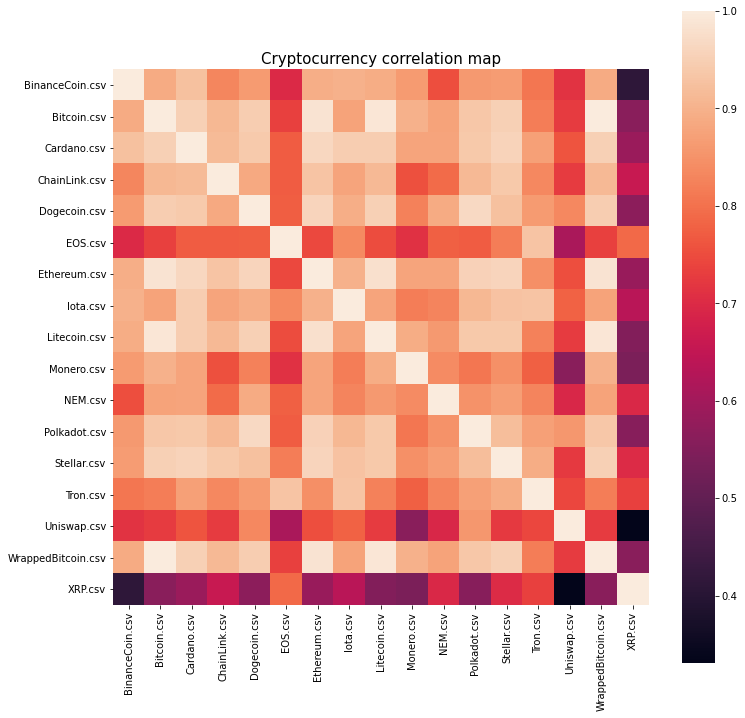

In [5]:
temp_df = df[cols_to_use]
corrmat = temp_df.corr(method='spearman')
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(corrmat, vmax=1., square=True)
plt.title("Cryptocurrency correlation map", fontsize=15)
plt.show()